In [1]:
%matplotlib inline
%reload_ext Cython
font = {'family' : 'sans-serif',
        'style': 'normal',
        'weight' : 'medium',
        'size' : 8}
import matplotlib
matplotlib.rc('font', **font)
from __future__ import print_function
import time
import pylab
import numpy as np
from numpy import int16, uint16, uint8, float16, log2

import cv2
from cv2 import cvtColor as convertColor, COLOR_BGR2GRAY, COLOR_GRAY2RGB,\
                resize, imread, imwrite

try:                  #nearest neighboor interpolation
  from cv2.cv import CV_INTER_NN, \
                     CV_CAP_PROP_FRAME_WIDTH, \
                     CV_CAP_PROP_FRAME_HEIGHT, \
                     CV_CAP_PROP_FPS, \
                     CV_LOAD_IMAGE_GRAYSCALE
except:
  from cv2 import INTER_NEAREST as CV_INTER_NN, \
                  CAP_PROP_FRAME_WIDTH as CV_CAP_PROP_FRAME_WIDTH, \
                  CAP_PROP_FRAME_HEIGHT as CV_CAP_PROP_FRAME_HEIGHT, \
                  CAP_PROP_FPS as CV_CAP_PROP_FPS, \
                  IMREAD_GRAYSCALE as CV_LOAD_IMAGE_GRAYSCALE

import pyximport; pyximport.install()
#from pydvs.generate_spikes import *
from pydvs.generate_spikes import *



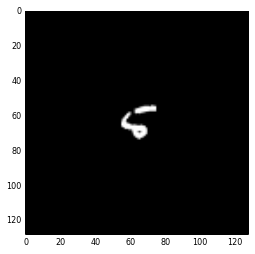

In [2]:
img_path = "./t10k-images-idx3-ubyte__idx_008__lbl_5_.png"
orig_w = 28
out_w = 128
fr = (out_w - orig_w)//2
to = fr + orig_w

num_cycles = 3
history_weight = 0.95
cam_fps = 60
frame_time_ms = int(1000./cam_fps)
speed = 1. #pix/sec

out_img = np.zeros((out_w, out_w), dtype=int16)
ctr_img = np.zeros((out_w, out_w), dtype=int16)
orig_img = imread(img_path, CV_LOAD_IMAGE_GRAYSCALE)
ctr_img[fr:to, fr:to] = orig_img

pylab.figure()
pylab.imshow(ctr_img, cmap='Greys_r')
pylab.show()
    

In [3]:
for j in range(100):
    for i in range(256):
        out_img[:] = traverse_image(ctr_img, i, speed, 0)
        cv2.imshow("anim", out_img.astype(dtype=uint8))
        k = cv2.waitKey(1)
        if k == 27 or k==ord('q'):         # wait for ESC key to exit
            cv2.destroyAllWindows()
    #     cv2.waitKey(frame_time_ms)

cv2.destroyAllWindows()